**Exploratory Data Analysis Mercado Livre**

In [1]:
import pandas as pd
import requests
import json

The first step is the definition of the function that will fetch the data stored in the Mercado Livre public API.

The product to be searched can be informed in the variable 'product'.

In [2]:
# Return the data in API
def search_data():
    # Connect with the public API, download the content in json format
    request = requests.get(f"https://api.mercadolibre.com/sites/MLB/search?q={product}")
    data = json.loads(request.content)

    return data

In [3]:
# Edit the variable product. Type the product to be researched, example: 'cofre', 'câmera de segurança', etc
product = "cofre"

In [4]:
# Store the data in json format
dataset = search_data()

**Investigating Data**

In the following step the dataset is investigated. The data download from the API is represented in a dictionary that contains several data and metadata, which is not ready to infer statistics and needs to be pre-processed.

The keys of the dictionary are evaluated in order to find which represents the most valuable data in terms of relevant information.

Initially the key result is the first to represent good data insights.

In [5]:
print(dataset.keys())

dict_keys(['site_id', 'country_default_time_zone', 'query', 'paging', 'results', 'sort', 'available_sorts', 'filters', 'available_filters', 'pdp_tracking'])


In [6]:
print(len(dataset['results']))

50


In [7]:
# Key 'results' dataframe
df = pd.DataFrame(dataset['results'])

In [8]:
df.head()

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,...,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,official_store_name,differential_pricing,variation_filters,variations_data
0,MLB3059005282,Cofre Eletrônico Digital Em Aço Teclado Senha ...,new,878844-MLA52871550631_122022,MLB20692931,gold_special,https://www.mercadolivre.com.br/cofre-eletrnic...,buy_it_now,MLB,MLB33430,...,"{'quantity': 12, 'amount': 12.59, 'rate': 16.6...",None,True,None,[],FRXY46302,NaN,NaN,NaN,NaN
1,MLB3377629545,Cofre Digital Eletrônico Grande 50cm Senha E C...,new,970441-MLU72566189718_112023,MLB24472893,gold_special,https://www.mercadolivre.com.br/cofre-digital-...,buy_it_now,MLB,MLB33430,...,"{'quantity': 12, 'amount': 55.65, 'rate': 16.3...",None,True,None,[],ZOHW19162,NaN,NaN,NaN,NaN
2,MLB3548387589,Mini Cofre Parede Guarda Chaves Senha Airbnb J...,new,628796-MLU71349147191_082023,MLB26622695,gold_special,https://www.mercadolivre.com.br/mini-cofre-par...,buy_it_now,MLB,MLB33430,...,"{'quantity': 12, 'amount': 8.83, 'rate': 16.64...",None,True,None,[],APIJ69407,NaN,NaN,NaN,NaN
3,MLB3049617790,Cofre Digital Eletrônico Para Armas Jóias Docu...,new,688774-MLU74988940142_032024,MLB20222736,gold_special,https://www.mercadolivre.com.br/cofre-digital-...,buy_it_now,MLB,MLB33430,...,"{'quantity': 12, 'amount': 20.89, 'rate': 16.6...",None,True,None,[],XHWM51306,NaN,NaN,NaN,NaN
4,MLB3372390051,Cofre Eletrônico Digital Visor Lcd Teclado Sen...,new,741972-MLU72831732141_112023,MLB20794536,gold_special,https://www.mercadolivre.com.br/cofre-eletrnic...,buy_it_now,MLB,MLB33430,...,"{'quantity': 12, 'amount': 21.22, 'rate': 16.6...",None,True,None,[],WUKX66455,NaN,NaN,NaN,NaN


# **1. Investigation Columns**

In this step the daframe obtained from the API is investigated in order to find the columns which contain the most relevant information in terms of numeric and categorical values.

The goal is to generate a clean data frame that will be performed an exploratory analysis.

In [9]:
# Unique types in condition
df['condition'].unique()

array(['new'], dtype=object)

In [10]:
# Unique types in catalog_listing
df['catalog_listing'].unique()

array([ True, False])

In [11]:
# Unique types in listing_type_id
df['listing_type_id'].unique()

array(['gold_special', 'gold_pro'], dtype=object)

In [12]:
# Unique types in buying_mode
df['buying_mode'].unique()

array(['buy_it_now'], dtype=object)

In [13]:
# Unique types in price
df['price'].unique()

array([ 129.52,  573.99,   90.84,  214.91,  218.31,  472.69,  151.89,
         76.53,  297.5 ,  228.96,  594.99,  108.  ,  239.92,  497.46,
        333.28,  160.  ,  114.61,  309.9 ,  117.  ,  209.9 ,  339.69,
         78.9 ,  119.99,   40.35,   64.9 ,   19.13,   59.46,  204.9 ,
        141.5 ,  406.99,   76.84,  147.  ,  169.9 ,  182.  ,   78.98,
         60.97,  959.9 ,  129.99,  799.9 ,  447.  ,  137.9 ,  910.  ,
        279.9 ,  237.  , 2013.9 ,  279.99])

In [14]:
# Unique types in original_price
df['original_price'].unique()

array([ 179.9 ,  699.99,     nan,  249.9 ,  239.9 ,  599.99,  151.89,
        119.99,  319.9 ,  228.96,  299.9 ,  429.99,   22.9 ,   67.  ,
       1000.  , 2119.9 ])

In [15]:
# Unique types in sale_price
df['sale_price'].unique()

array([None], dtype=object)

In [16]:
# Unique types in sale_price
df['available_quantity'].unique()

array([ 500,  100,    1,  150,   50,  250, 5000])

In [17]:
# Each item of the shipping column has a dictionary embedded
df['shipping'][0]

{'store_pick_up': False,
 'free_shipping': True,
 'logistic_type': 'fulfillment',
 'mode': 'me2',
 'tags': ['fulfillment', 'self_service_in', 'mandatory_free_shipping'],
 'benefits': None,
 'promise': None,
 'shipping_score': -1}

In [18]:
# Unique types in stop_time
df['stop_time'].unique()

array(['2042-12-10T04:00:00.000Z', '2043-07-09T04:00:00.000Z',
       '2044-05-24T13:31:56.000Z', '2042-12-07T04:00:00.000Z',
       '2043-07-05T04:00:00.000Z', '2044-05-11T20:53:08.000Z',
       '2043-07-07T04:00:00.000Z', '2043-12-28T04:00:00.000Z',
       '2043-07-23T04:00:00.000Z', '2043-06-19T04:00:00.000Z',
       '2044-02-19T16:09:53.000Z', '2044-01-31T04:00:00.000Z',
       '2044-05-05T15:20:19.000Z', '2044-03-19T04:00:00.000Z',
       '2042-02-10T04:00:00.000Z', '2043-11-17T22:24:09.000Z',
       '2042-12-16T04:00:00.000Z', '2041-08-28T04:00:00.000Z',
       '2044-03-31T04:00:00.000Z', '2043-05-10T04:00:00.000Z',
       '2043-02-08T04:00:00.000Z', '2043-01-11T04:00:00.000Z',
       '2044-04-28T00:26:37.000Z', '2044-05-12T04:00:00.000Z',
       '2043-08-31T04:00:00.000Z', '2044-01-19T04:00:00.000Z',
       '2044-04-11T13:33:12.000Z', '2043-11-11T04:00:00.000Z',
       '2044-03-24T17:06:30.000Z', '2044-02-01T04:00:00.000Z',
       '2044-05-12T13:13:23.000Z', '2044-03-20T15:45:02

The column installments contain a dictionary in each element. This column is transformed into a new dataframe.

In [19]:
installments = pd.DataFrame(dict(df['installments']))

In [20]:
installments = installments.transpose()

In [21]:
installments.shape

(50, 4)

In [22]:
installments.head()

,quantity,amount,rate,currency_id
0,12,12.59,16.64,BRL
1,12,55.65,16.34,BRL
2,12,8.83,16.64,BRL
3,12,20.89,16.64,BRL
4,12,21.22,16.64,BRL


In [23]:
installments.drop(["currency_id"],axis='columns', inplace=True)

In [24]:
installments.head()

,quantity,amount,rate
0,12,12.59,16.64
1,12,55.65,16.34
2,12,8.83,16.64
3,12,20.89,16.64
4,12,21.22,16.64


# **2. New Data Frame**

In this step a new data frame is built with the most relevant columns for an exploratory data analysis.

Each column is scrutinized in order to find essential information. Some columns have dictionaries embedded in each row, so it is necessary to take a look and gather all essential the information in a new dataframe.

In [25]:
# Dropping not essential columns
df.drop(["condition","thumbnail_id", "catalog_product_id","listing_type_id","permalink", "buying_mode", "installments", "winner_item_id",
"discounts", "promotions", "inventory_id", "differential_pricing", "official_store_name", "variation_filters", "variations_data"],axis='columns', inplace=True)

In [26]:
df.head(1)

,id,title,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,catalog_listing
0,MLB3059005282,Cofre Eletrônico Digital Em Aço Teclado Senha ...,MLB,MLB33430,MLB-SAFES,http://http2.mlstatic.com/D_878844-MLA52871550...,BRL,1,129.52,179.9,None,500,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2042-12-10T04:00:00.000Z,"{'id': 1121312484, 'nickname': 'CLASP STORE'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",True


In [27]:
# New dataframe from the column sellers
sellers = pd.DataFrame(dict(df["seller"]))
sellers = sellers.transpose()

In [28]:
sellers.head()

,id,nickname
0,1121312484,CLASP STORE
1,789812463,VERONA SHOP
2,102704303,NEBRASKA PARTS
3,1121312484,CLASP STORE
4,789812463,VERONA SHOP


In [29]:
# New dataframe from the column attributes, seleting the brand's name
brands ={
    "brand": []
}

for i in range(len(df["attributes"])):
  #print(df["attributes"][i][0]['value_name'])
  brands["brand"].append(df["attributes"][i][0]['value_name'])

brands = pd.DataFrame(brands)
brands.head()

,brand
0,Forkis
1,Forkis
2,Getwell
3,Forkis
4,Forkis


In [30]:
# Dropping new other columns
df.drop(["site_id","category_id","domain_id","thumbnail","currency_id","order_backend","official_store_id","use_thumbnail_id","accepts_mercadopago",
"shipping","seller","attributes","sale_price"],axis='columns', inplace=True)

In [31]:
df["brand"] = brands['brand']

In [32]:
df["seller"] = sellers["nickname"]

In [33]:
df.head(2)

,id,title,price,original_price,available_quantity,stop_time,catalog_listing,brand,seller
0,MLB3059005282,Cofre Eletrônico Digital Em Aço Teclado Senha ...,129.52,179.90,500,2042-12-10T04:00:00.000Z,True,Forkis,CLASP STORE
1,MLB3377629545,Cofre Digital Eletrônico Grande 50cm Senha E C...,573.99,699.99,100,2043-07-09T04:00:00.000Z,True,Forkis,VERONA SHOP


**Final dataframe**

In [34]:
# Definitive data frame
data = pd.concat([df,installments],axis=1)
data.head(2)

,id,title,price,original_price,available_quantity,stop_time,catalog_listing,brand,seller,quantity,amount,rate
0,MLB3059005282,Cofre Eletrônico Digital Em Aço Teclado Senha ...,129.52,179.90,500,2042-12-10T04:00:00.000Z,True,Forkis,CLASP STORE,12,12.59,16.64
1,MLB3377629545,Cofre Digital Eletrônico Grande 50cm Senha E C...,573.99,699.99,100,2043-07-09T04:00:00.000Z,True,Forkis,VERONA SHOP,12,55.65,16.34


# **3. Exploratory Analysis**

In [35]:
# Number of rows and columns
data.shape

(50, 12)

In [36]:
# Gathering data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50 non-null     object 
 1   title               50 non-null     object 
 2   price               50 non-null     float64
 3   original_price      21 non-null     float64
 4   available_quantity  50 non-null     int64  
 5   stop_time           50 non-null     object 
 6   catalog_listing     50 non-null     bool   
 7   brand               50 non-null     object 
 8   seller              50 non-null     object 
 9   quantity            45 non-null     object 
 10  amount              45 non-null     object 
 11  rate                45 non-null     object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 4.5+ KB


Changing data type of values in int64,float 64 to int32, float32

In [37]:
# Rounding two decimals places
pd.set_option("display.precision", 2)

In [38]:
data["price"] = data["price"].astype("float32")
data["original_price"] = data["original_price"].astype("float32")
data["available_quantity"] =  data["available_quantity"].astype("int32")

In [39]:
# Count missing values in relevant columns
data.isna().sum(axis = 0)

id                     0
title                  0
price                  0
original_price        29
available_quantity     0
stop_time              0
catalog_listing        0
brand                  0
seller                 0
quantity               5
amount                 5
rate                   5
dtype: int64

In [40]:
# Replacing missing values with the element that appers the most in the table
data["quantity"] = data["quantity"].fillna("10")

In [41]:
# Replacing missing values with the mean
data["amount"] = data["amount"].fillna(data["amount"].mean())

In [42]:
data["rate"] = data["rate"].fillna(data["rate"].mean())

In [43]:
# Changing data types of columns in the object format to int and float
data["quantity"] = data["quantity"].astype("int32")
data["amount"] = data["amount"].astype("float32")
data["rate"] = data["rate"].astype("float32")

In [44]:
# Gathering data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50 non-null     object 
 1   title               50 non-null     object 
 2   price               50 non-null     float32
 3   original_price      21 non-null     float32
 4   available_quantity  50 non-null     int32  
 5   stop_time           50 non-null     object 
 6   catalog_listing     50 non-null     bool   
 7   brand               50 non-null     object 
 8   seller              50 non-null     object 
 9   quantity            50 non-null     int32  
 10  amount              50 non-null     float32
 11  rate                50 non-null     float32
dtypes: bool(1), float32(4), int32(2), object(5)
memory usage: 3.3+ KB


Taking a look at some categorical columns

In [45]:
# Counting brands
data.value_counts("brand")

brand
Forkis           9
Fercar           5
Cofres Lozano    4
Contelux         3
Animo Shop       3
Oria             2
Lorben           2
Unyhome          2
Safewell         2
PCI Eletro       2
Yale             2
Getwell          2
Genérica         1
Fixser           1
Pado             1
Preto            1
SH               1
DME              1
Tssaper          1
CCS              1
Vaultz           1
Western          1
Xsafe            1
ACCAFT           1
Name: count, dtype: int64

In [46]:
# Counting sellers
data.value_counts("seller")

seller
SELLOR DISTRIBUIDORA     5
CLASP STORE              4
COFRESLOZANO             4
MAIKO_BRASIL             3
CONTELUX                 3
DUBAI.IMPORTADORA SP     2
LORBEN_OFICIAL           2
ANIMO SHOP               2
VERONA SHOP              2
ELETROEXPRESS-ML         2
NEBRASKA PARTS           1
SHINE062                 1
STOREONLINECAPIXABA      1
SAFEWELL OFICIAL         1
RENOIMPORTS              1
PERFETTO IMPORTS         1
TONGOU                   1
PABER.                   1
TOY SHOPPETS             1
ACCAFT DISTRIBUIDORA     1
MEGA ALFA                1
KEYCASA                  1
INOVARMETAIS             1
IMPRESSORAJATO.COM.BR    1
GSJ SANTOS               1
FLYSEA                   1
FASTBRAS IMPORT          1
CASAGOLDEN OFICIAL       1
BF IMPORTS23             1
BAGI7124038              1
JR2X                     1
Name: count, dtype: int64

Describing numerical columns

In [47]:
data.describe()

,price,original_price,available_quantity,quantity,amount,rate
count,50.00,21.00,50.00,50.00,50.00,50.00
mean,272.07,391.51,163.62,10.00,33.52,10.29
std,334.51,486.39,707.96,3.04,31.31,7.69
min,19.13,22.90,1.00,3.00,3.91,0.00
25%,81.95,67.00,1.00,10.00,15.20,0.00
50%,164.95,239.90,1.00,12.00,31.05,16.34
75%,306.80,599.99,100.00,12.00,34.85,16.64
max,2013.90,2119.90,5000.00,12.00,201.39,16.64


**Original_price column**

Most of the values in the "original_price" column are missing, making it challenging to handle. Strategies like imputation doesn't seem to be a good alternative because statistics like mean and median would be highly sensitive to a huge amount of missing data.

The column “original_price” will not be used for statistics and analysis.

In [48]:
original_price = (data['original_price'].isna().sum(axis = 0))/ len(data['original_price'])
print(f"Percentage of missing values in the original_price column: {round((original_price*100),2)}%")

Percentage of missing values in the original_price column: 58.0%


# **4. Visualizing Data**

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

Visualizing the amount of each brand present in the dataset

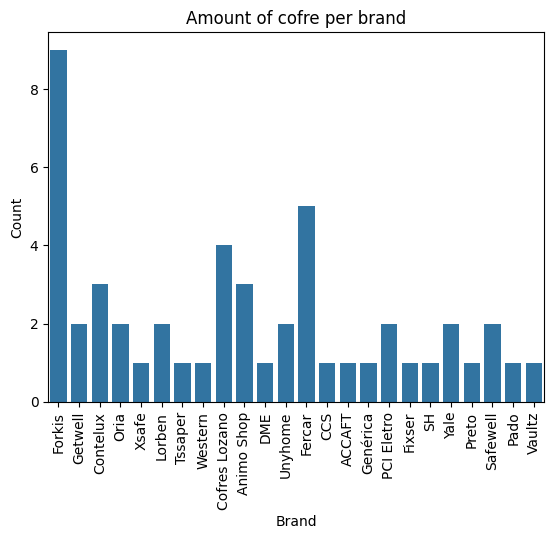

In [50]:
# Counting each brand amount
sns.countplot(data=data,x="brand")
plt.title(f"Amount of {product} per brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Visualizing the top sellers

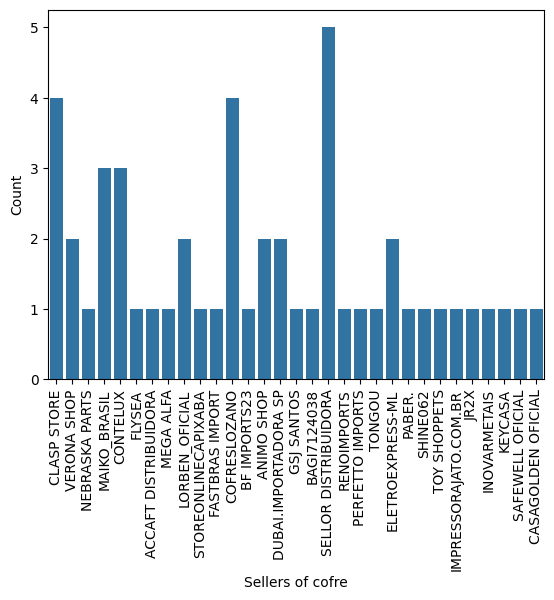

In [51]:
# Counting each seller
sns.countplot(data=data,x="seller")
plt.xlabel(f"Sellers of {product}")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Visualizing each brand product and their average prices

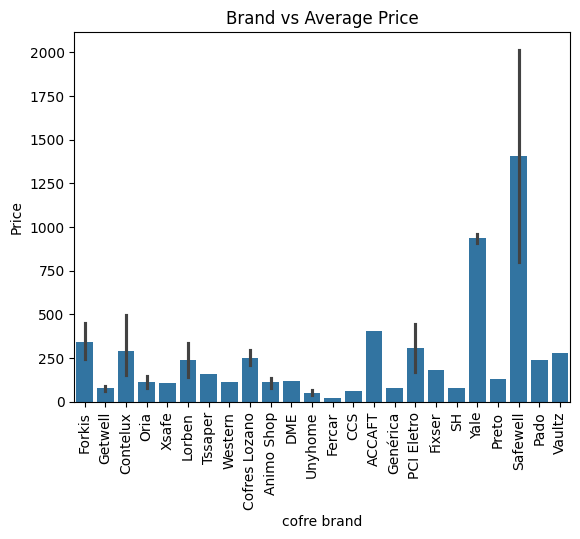

In [52]:
sns.barplot(data=data, x="brand", y="price")
plt.xlabel(f"{product} brand")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.title("Brand vs Average Price")
plt.show()

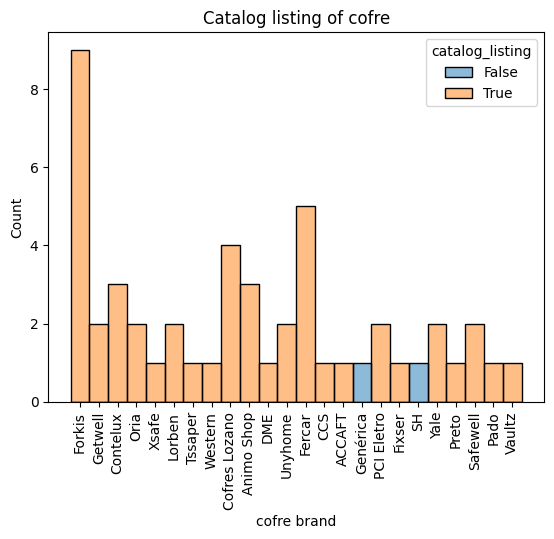

In [53]:
sns.histplot(data=data, x="brand", hue="catalog_listing",binwidth=1.5)
plt.title(f"Catalog listing of {product}")
plt.xlabel(f"{product} brand")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Grouping the dataset by seller and calculating their average price

In [54]:
data.groupby("seller")["price"].mean().apply(lambda x: round(x, 2)) # rounding float value 2 decimals

seller
ACCAFT DISTRIBUIDORA      228.96
ANIMO SHOP                108.40
BAGI7124038                64.90
BF IMPORTS23              117.00
CASAGOLDEN OFICIAL        279.99
CLASP STORE               294.83
COFRESLOZANO              251.15
CONTELUX                  352.11
DUBAI.IMPORTADORA SP      124.99
ELETROEXPRESS-ML          308.45
FASTBRAS IMPORT           114.61
FLYSEA                     76.53
GSJ SANTOS                 40.35
IMPRESSORAJATO.COM.BR     959.90
INOVARMETAIS              910.00
JR2X                      799.90
KEYCASA                   237.00
LORBEN_OFICIAL            237.39
MAIKO_BRASIL              369.96
MEGA ALFA                 108.00
NEBRASKA PARTS             90.84
PABER.                    182.00
PERFETTO IMPORTS           76.84
RENOIMPORTS                59.46
SAFEWELL OFICIAL         2013.90
SELLOR DISTRIBUIDORA       19.13
SHINE062                   78.98
STOREONLINECAPIXABA       160.00
TONGOU                    147.00
TOY SHOPPETS               60.97
VER

In [55]:
data.groupby("brand")["price"].mean().apply(lambda x: round(x, 2)) # rounding float value 2 decimals

brand
ACCAFT            406.99
Animo Shop        111.27
CCS                59.46
Cofres Lozano     251.15
Contelux          292.77
DME               119.99
Fercar             19.13
Fixser            182.00
Forkis            342.39
Genérica           76.84
Getwell            75.90
Lorben            237.39
Oria              111.76
PCI Eletro        308.45
Pado              237.00
Preto             129.99
SH                 78.98
Safewell         1406.90
Tssaper           160.00
Unyhome            52.62
Vaultz            279.99
Western           114.61
Xsafe             108.00
Yale              934.95
Name: price, dtype: float64

Grouping by seller and the brand they sell, along with the amount available

In [56]:
data[['seller','brand']].value_counts()

seller                 brand        
SELLOR DISTRIBUIDORA   Fercar           5
CLASP STORE            Forkis           4
COFRESLOZANO           Cofres Lozano    4
MAIKO_BRASIL           Forkis           3
CONTELUX               Contelux         2
LORBEN_OFICIAL         Lorben           2
ELETROEXPRESS-ML       PCI Eletro       2
ANIMO SHOP             Animo Shop       2
VERONA SHOP            Forkis           2
STOREONLINECAPIXABA    Tssaper          1
TONGOU                 Oria             1
TOY SHOPPETS           Getwell          1
SHINE062               SH               1
SAFEWELL OFICIAL       Safewell         1
RENOIMPORTS            CCS              1
PERFETTO IMPORTS       Genérica         1
PABER.                 Fixser           1
NEBRASKA PARTS         Getwell          1
MEGA ALFA              Xsafe            1
ACCAFT DISTRIBUIDORA   Contelux         1
KEYCASA                Pado             1
JR2X                   Safewell         1
IMPRESSORAJATO.COM.BR  Yale            

**Installments Data**

The last three columns of the dataset (quantity, amount, rate) represent the installments of the product.

Example:

         total payment amount = quantity x amount
         
         and

         total payment amount = price x 1.(rate)  

In [57]:
print("In the first row the product's price is R$ "+ "{:.2f}".format(round(data["price"][0],2)))
# The rate in an annual rate in %
# Price x ((rate/100)+1) = quantity x amount
print(f"In case the product is bought in long term in 12 installments the total amount would be R$ {round(data['quantity'][0] * data['amount'][0],2)}")

In the first row the product's price is R$ 129.52
In case the product is bought in long term in 12 installments the total amount would be R$ 151.08


In [58]:
# Creating new column to the data frame
data["total price"] = (data["quantity"] * data["amount"]).astype("float32")

In [59]:
newdata = data[["id","price","quantity","amount","rate","total price"]]
newdata.head()

,id,price,quantity,amount,rate,total price
0,MLB3059005282,129.52,12,12.59,16.64,151.08
1,MLB3377629545,573.99,12,55.65,16.34,667.80
2,MLB3548387589,90.84,12,8.83,16.64,105.96
3,MLB3049617790,214.91,12,20.89,16.64,250.68
4,MLB3372390051,218.31,12,21.22,16.64,254.64


In [60]:
newdata = newdata.sort_values("quantity")
newdata.head()

,id,price,quantity,amount,rate,total price
24,MLB3999783816,64.90,3,21.63,0.0,64.89
37,MLB3598247535,78.98,3,26.33,0.0,78.99
21,MLB3134697892,78.90,3,26.30,0.0,78.90
18,MLB4581675320,117.00,3,39.00,0.0,117.00
16,MLB3074629642,114.61,3,38.20,0.0,114.60


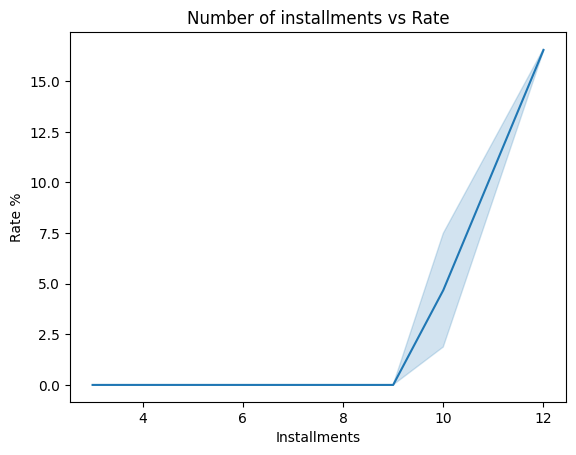

In [61]:
sns.lineplot(data=newdata,x="quantity", y="rate")
plt.title("Number of installments vs Rate")
plt.xlabel("Installments")
plt.ylabel("Rate %")

plt.show()

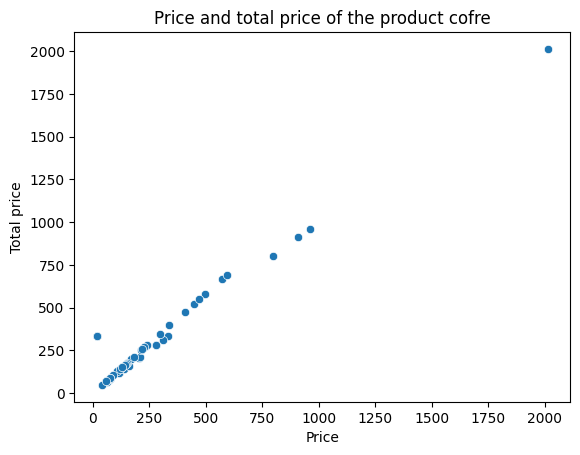

In [62]:
sns.scatterplot(data=newdata, x="price",y="total price")
plt.title(f"Price and total price of the product {product}")
plt.xlabel("Price")
plt.ylabel("Total price")
plt.show()